In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.2          ✔ dplyr   1.0.0     
✔ tidyr   1.1.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "gplus"

# Question 18

In [2]:
#../input/googleplusset/gplus/
library('igraph')
all_files = list.files(path='../input/gplus/', pattern="*.circles")
count = 0
for (file in all_files)
{
  file = paste("../input/gplus", file, sep="/")
  if (length(readLines(file)) > 2)
  {
    count = count + 1
  }
}
cat(paste('Number of Personal networks with more than 2 circles: ', count, sep=''))



Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




Number of Personal networks with more than 2 circles: 57

# Question 19

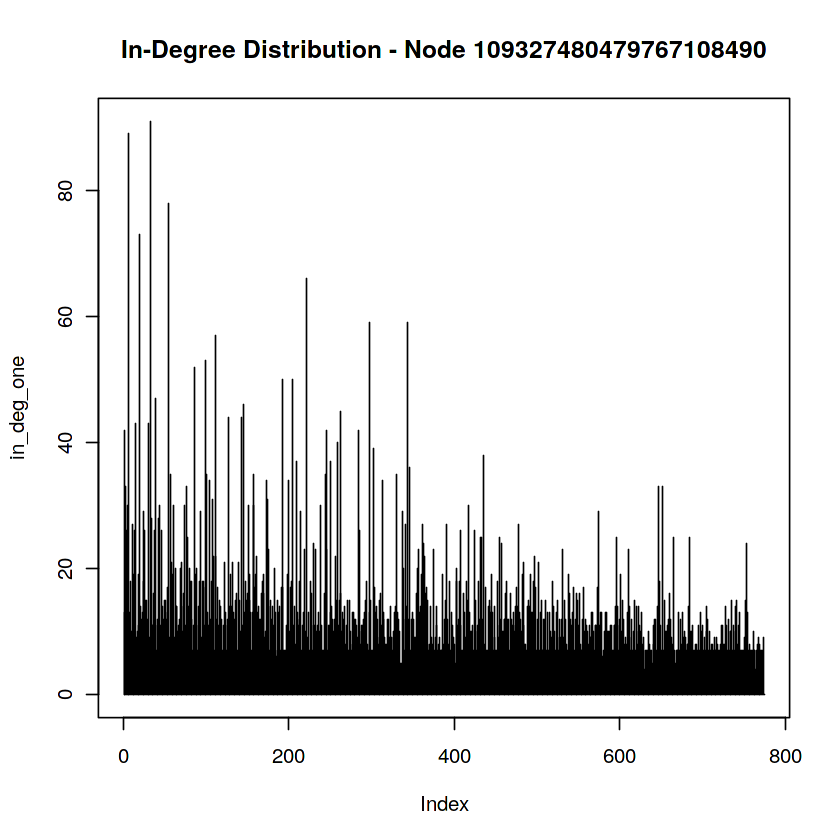

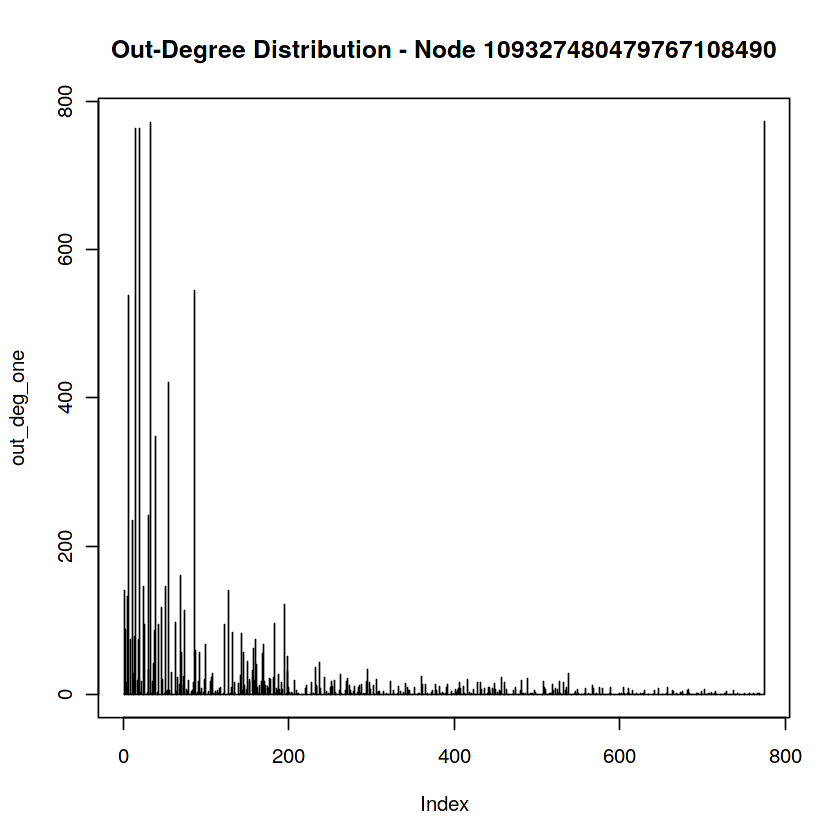

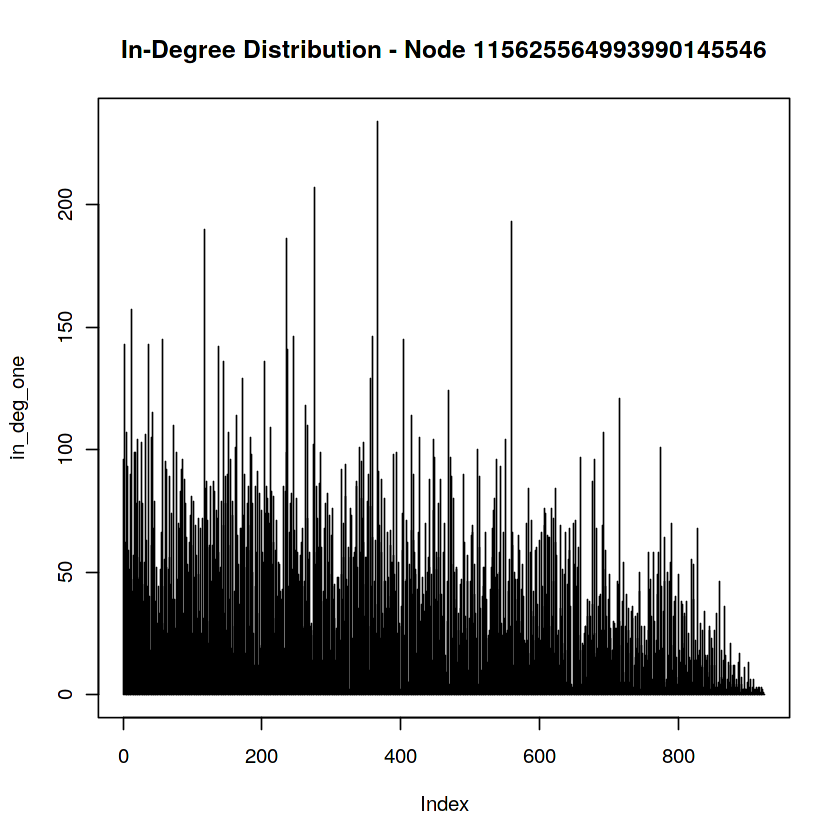

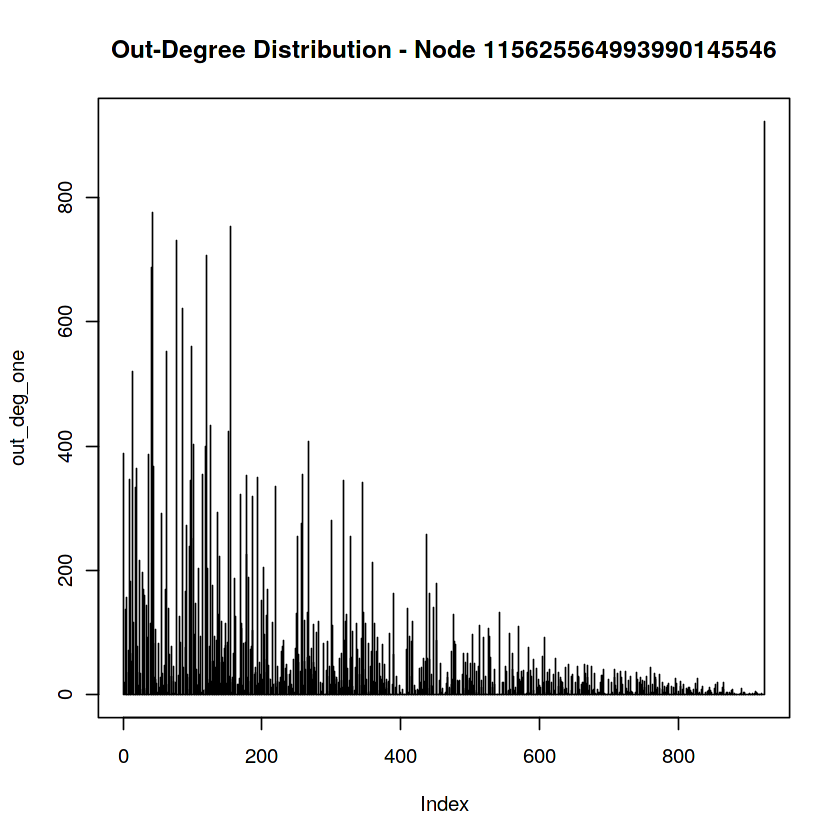

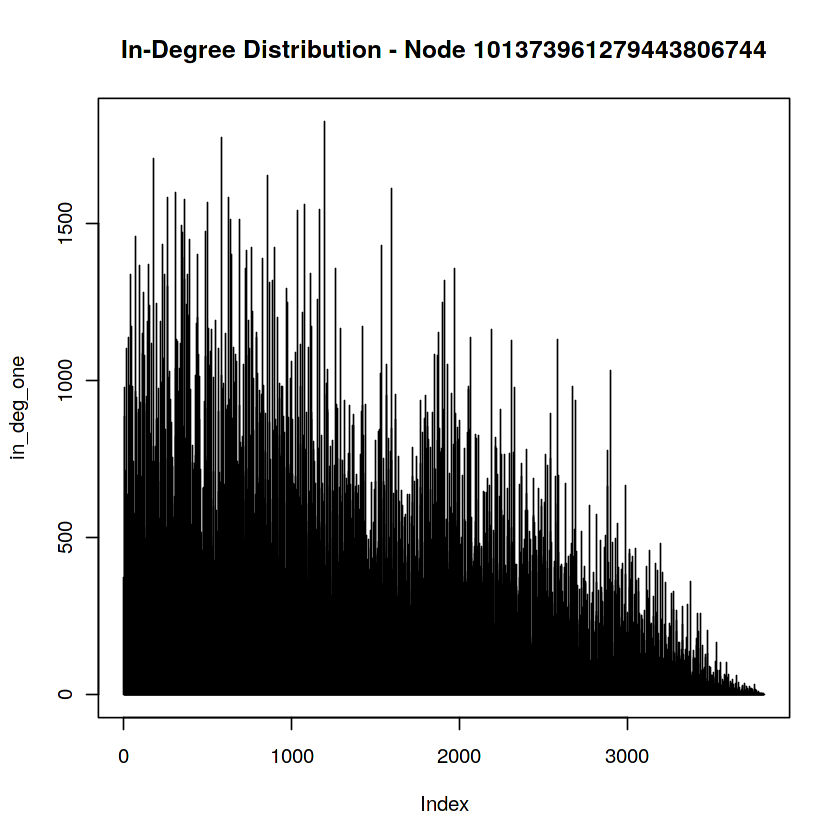

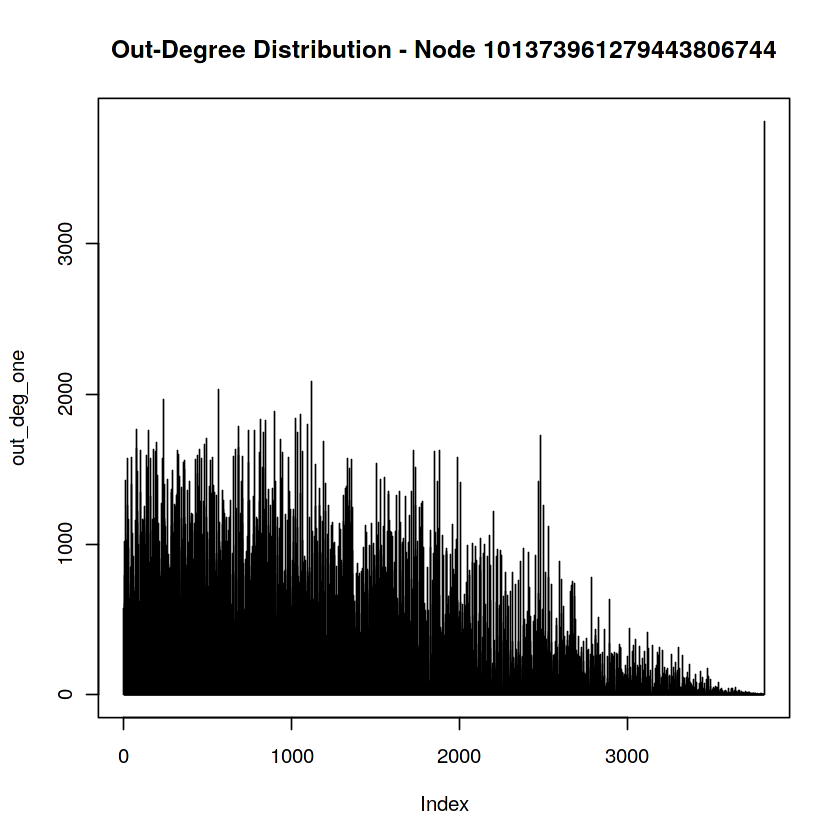

In [3]:
#109327480479767108490
#115625564993990145546
#101373961279443806744

nodes <- c('109327480479767108490','115625564993990145546','101373961279443806744')

##Node 1
for(i in 1:3)
{
    file_one = paste('../input/gplus/', nodes[i], '.edges', sep = '')
    graph_one = read_graph(file_one, format="ncol", directed=TRUE)
    graph_one = graph_one + vertex(nodes[i])
    for (j in seq(1, vcount(graph_one)-1, 1))
    {
          graph_one = graph_one + edge(vcount(graph_one), j)
    }
    in_deg_one = degree(graph_one, mode = 'in')
    plot(in_deg_one, type='h', main = paste('In-Degree Distribution - Node ', nodes[i], sep=''))
    out_deg_one = degree(graph_one, mode = 'out')
    plot(out_deg_one, type='h', main = paste('Out-Degree Distribution - Node ', nodes[i], sep=''))

}



# Question 20

Modularity for node 109327480479767108490: 0.279819399118423
Modularity for node 115625564993990145546: 0.323086827993393


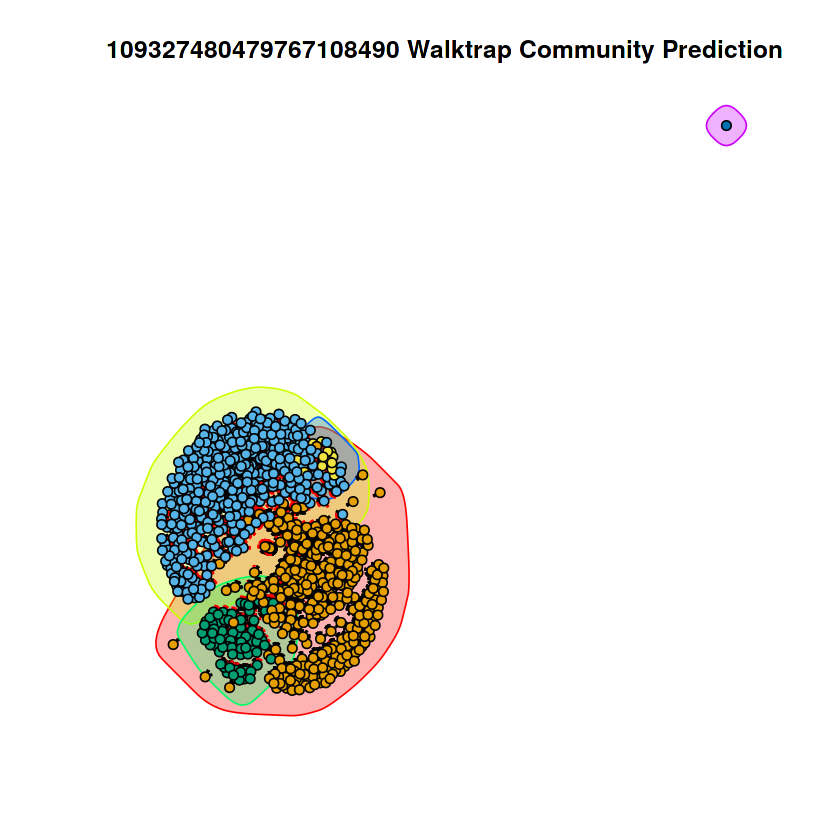

Modularity for node 101373961279443806744: 0.195091187953949


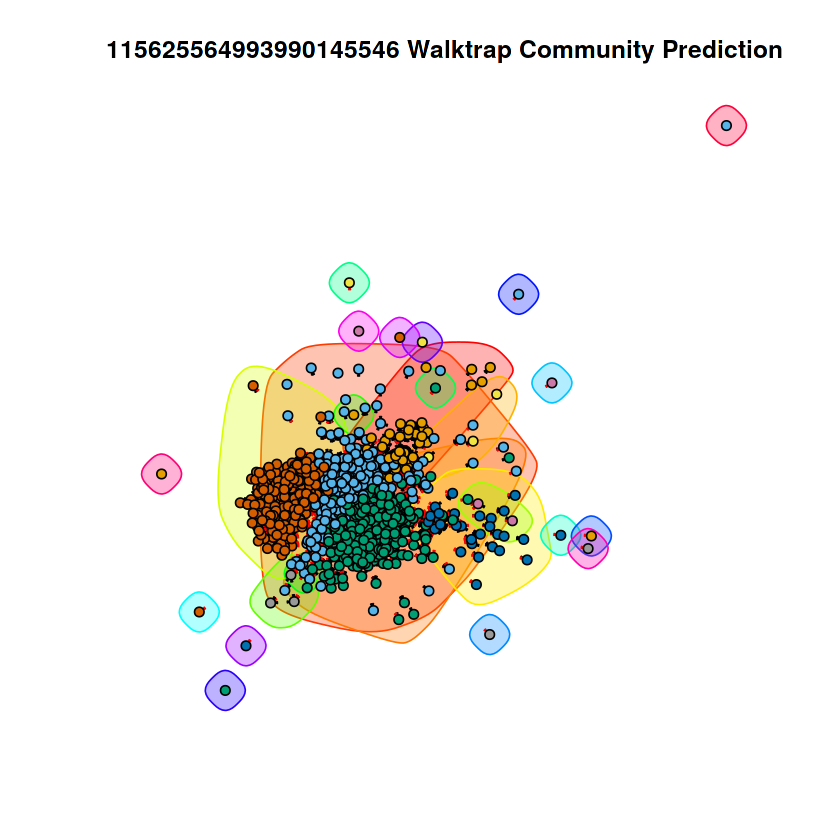

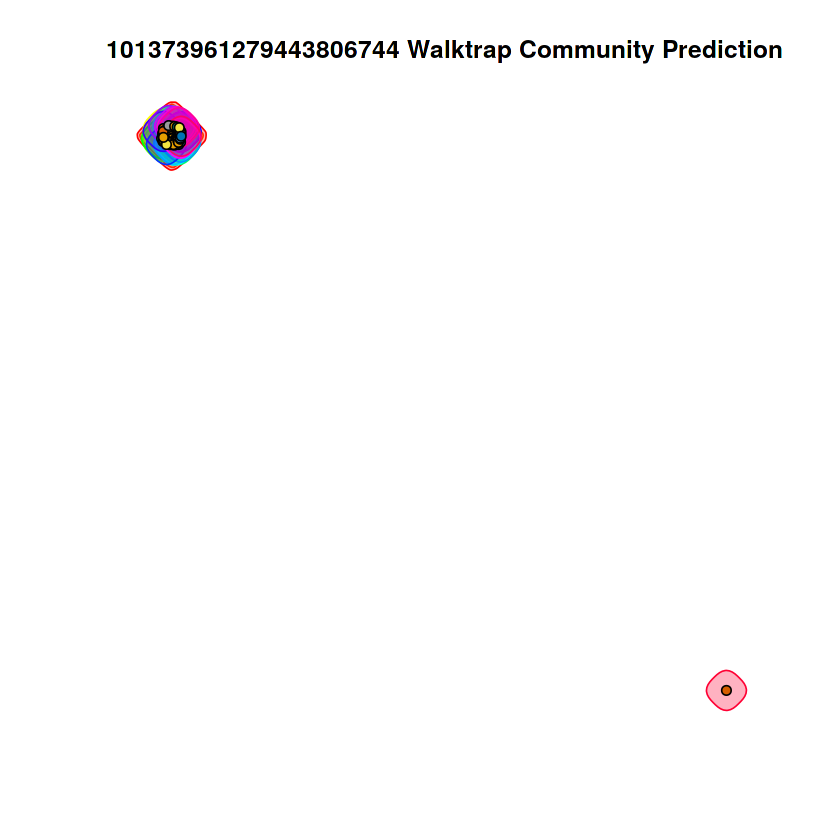

In [4]:
for (k in 1:3)
{
    color_choice = c('dodgerblue', 'darkorange', 'mediumpurple')
    file_one = paste('../input/gplus/', nodes[k], '.edges', sep = '')
    graph_one = read_graph(file_one, format="ncol", directed=TRUE)
    graph_one = graph_one + vertex(nodes[k])
    walktr = cluster_walktrap(graph_one)
    cat(paste('Modularity for node ', nodes[k], ': ', modularity(walktr), '\n', sep=''))
    plot(walktr, graph_one, vertex.size=3, vertex.label=NA, vertex.colors=color_choice[k], width=0,
         edge.arrow.size = 0.1, edge.lty=0, main=paste(nodes[k],"Walktrap Community Prediction"))
}


